# purpose of this notebook

* Produces the color magnitude diagram for cluster 9 for the paper 
* Visualizes the rest of the color magnitude diagram for the rest of the selected clusters


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [36]:
%matplotlib inline
%autoreload 2

In [5]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import sys
import numpy as np 

In [6]:
sys.path.append("../")

In [7]:
import calculate_astrophy_quantities as ca
import extract_catalog as ec
import plot_gal_prop as pg

In [8]:
data_dir = "../../data/"
data_file = "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5"
clusterID_file = "rich_cluster_ID.h5"

In [9]:
f = h5py.File(data_dir + data_file, "r")

# read in the clusters 

In [10]:
cluster_h5file = h5py.File(data_dir + clusterID_file, "r")

In [15]:
clstNos = cluster_h5file["rich_cluster_ID"][:]

In [50]:
%time dfs = {i: ec.extract_clst(f, i) for i in clstNos}

CPU times: user 705 ms, sys: 20.2 s, total: 20.9 s
Wall time: 20.9 s


# make fig 2. in the paper 

In [38]:
figPath = "../../paper/figures/finalized/"
fileprefix = "fig2_color_magnitude_diagram"

Converting apparent magnitude to absolute magnitude

assuming the cosmological redshift is z = 0.3


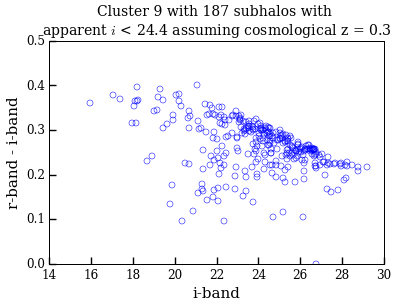

In [91]:
clstNo = 9
pg.plot_color_mag_diag(dfs[clstNo], "r_band", "i_band", band_limit=15, 
                       plot=True, clst=clstNo, subhalo_len_lim=1e3,
                       save=True, savePath=figPath, fileprefix=fileprefix,
                       title_mag_limit=24.4)

# make the rest of the color-magnitude diagrams for all the clusters used for the main results 

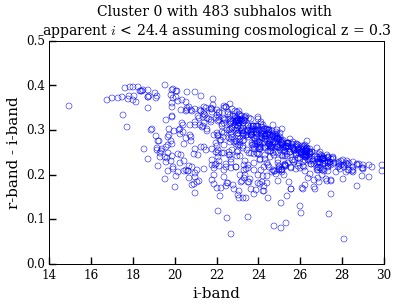

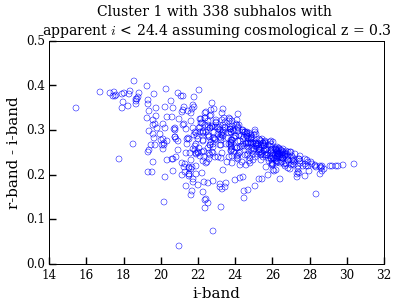

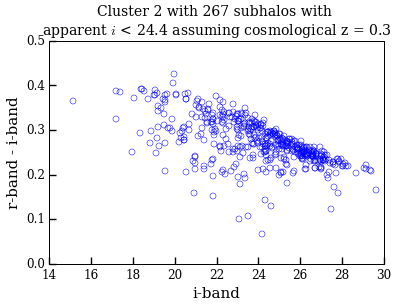

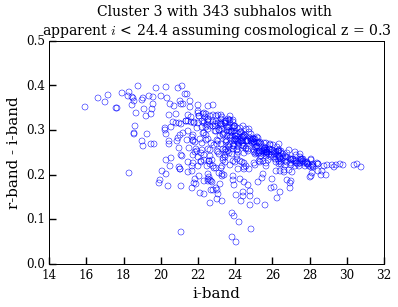

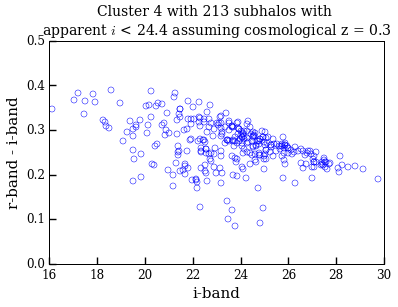

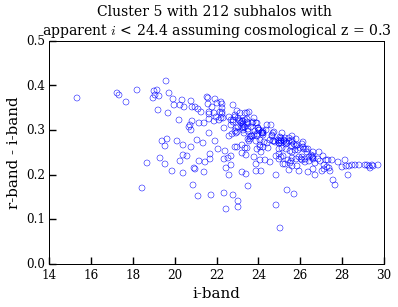

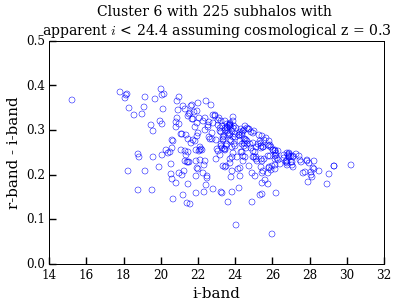

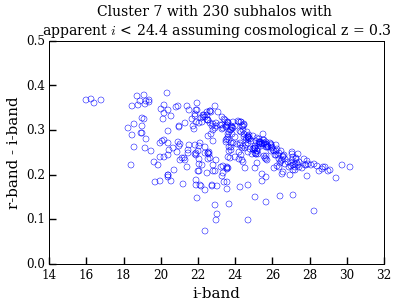

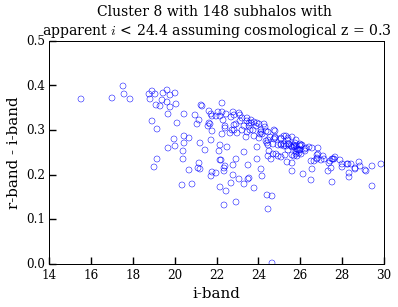

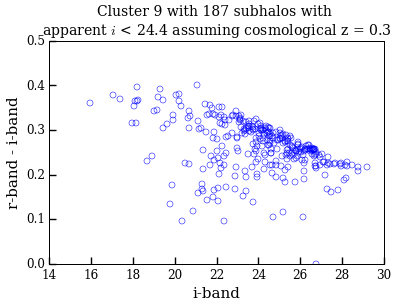

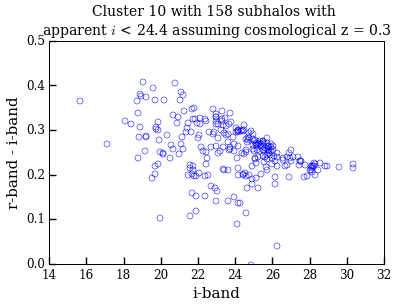

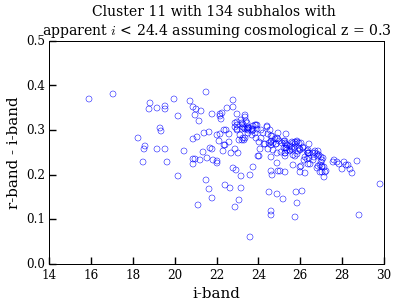

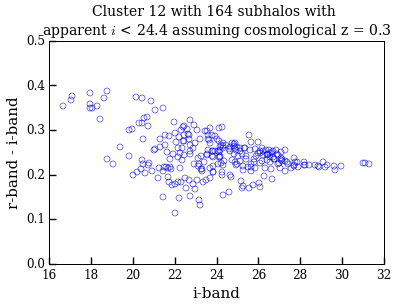

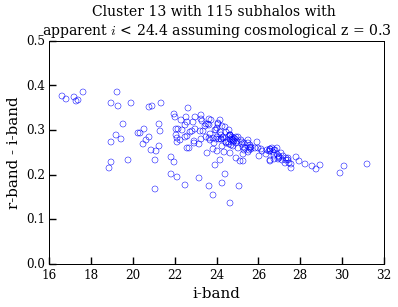

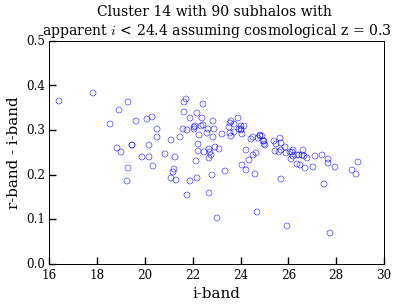

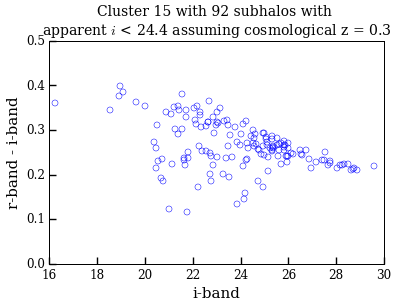

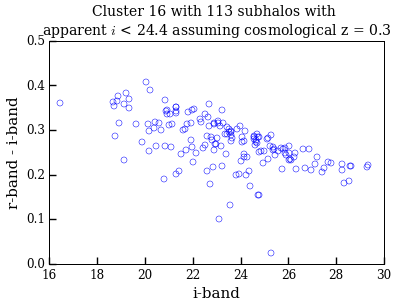

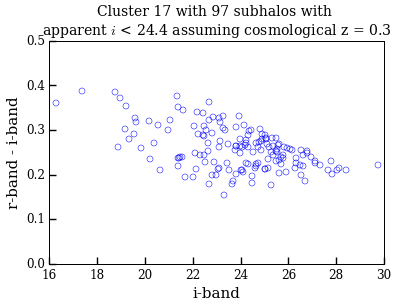

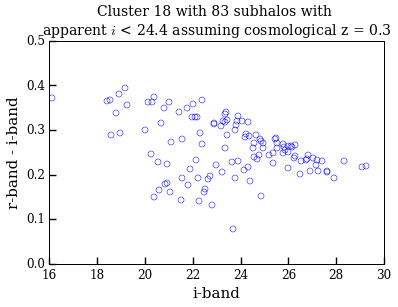

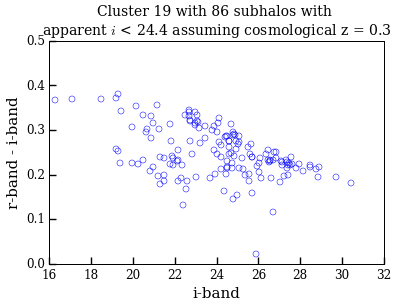

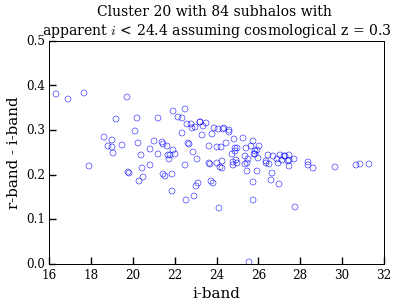

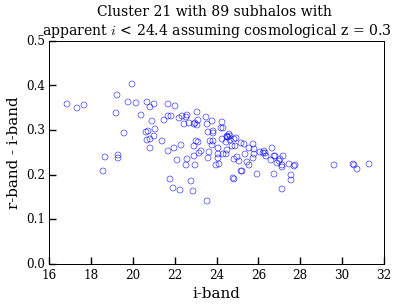

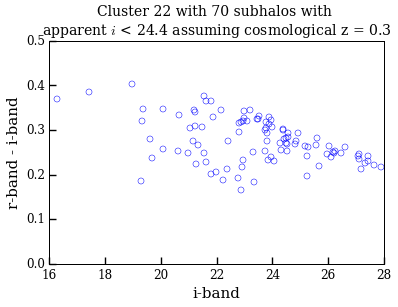

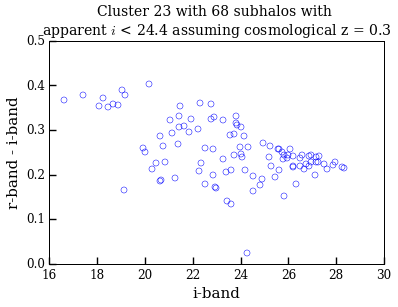

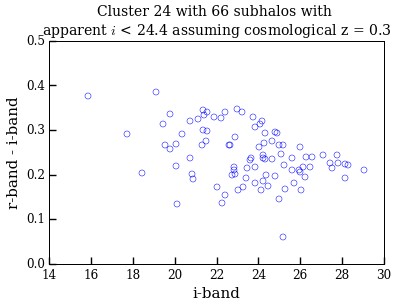

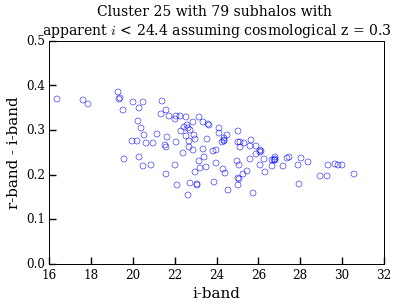

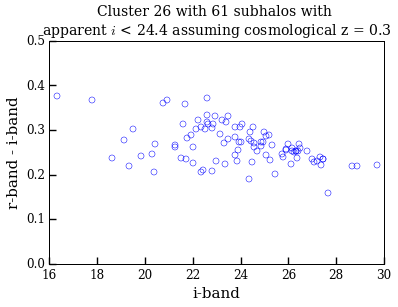

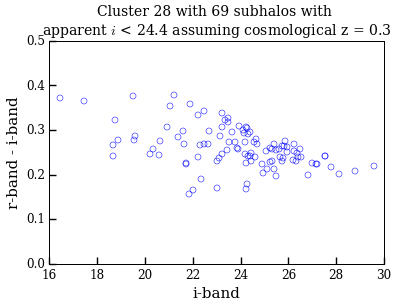

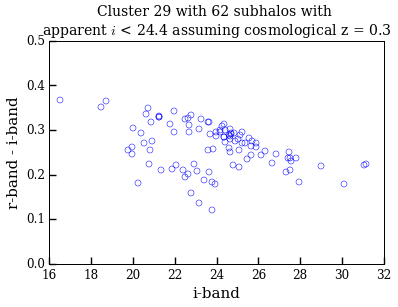

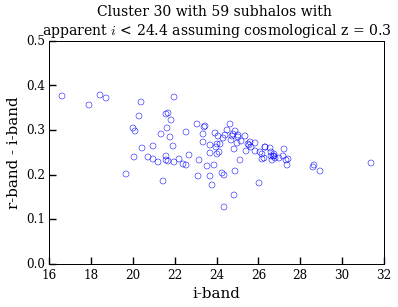

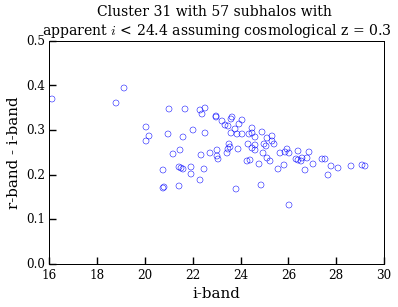

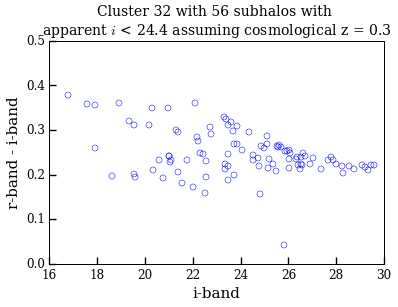

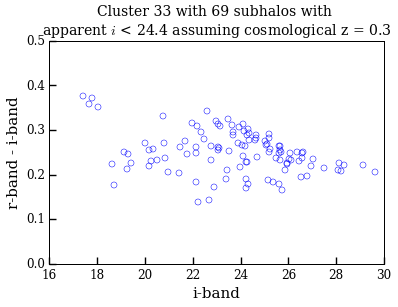

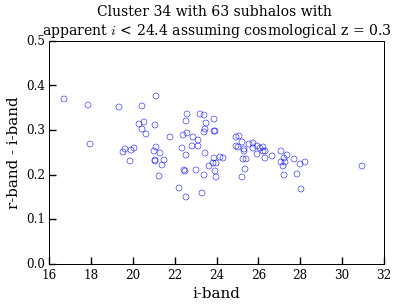

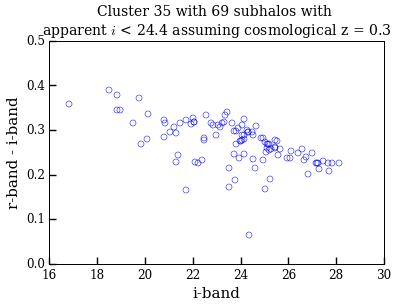

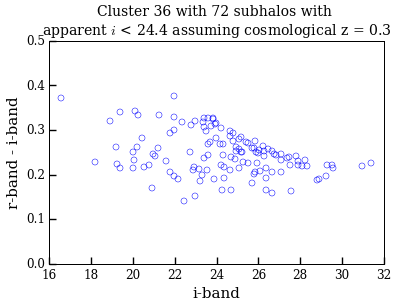

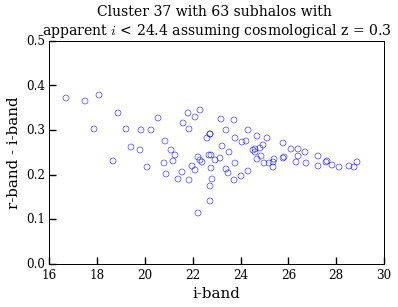

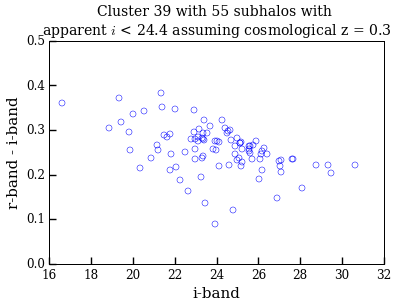

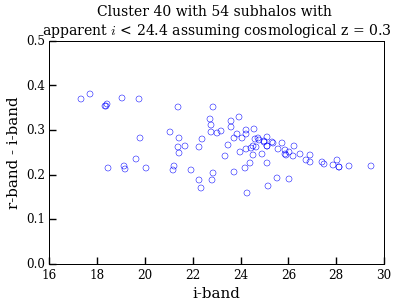

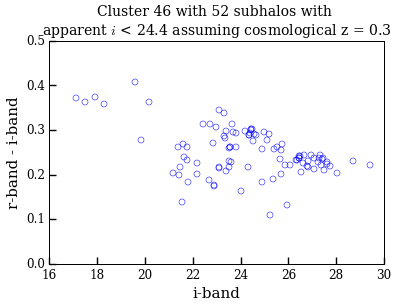

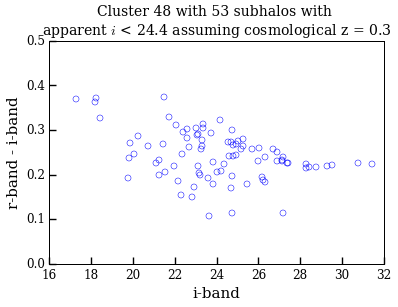

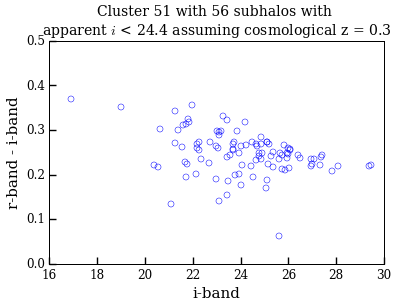

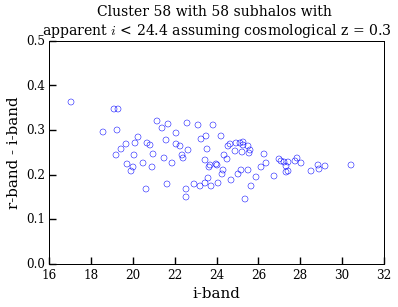

In [92]:
_ = map(lambda i: pg.plot_color_mag_diag(dfs[i], "r_band", "i_band", 15, 
                        plot=True, clst=i, subhalo_len_lim=1e3,
                        save=False, verbose=False, closePlot=True, 
                                    showPlot=True),
    clstNos)

# other color-magnitude diagrams 

other clusters with mass $ > 10^{13} M_\odot$ that did NOT make the richness cut

In [67]:
other_clusters = [i for i in range(0, 128) if i not in clstNos]

In [59]:
%time not_selected_dfs = {i: ec.extract_clst(f, i) for i in other_clusters}

CPU times: user 1.33 s, sys: 40 s, total: 41.3 s
Wall time: 41.3 s


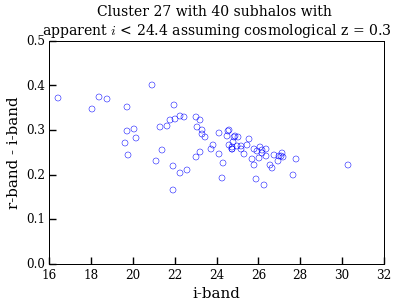

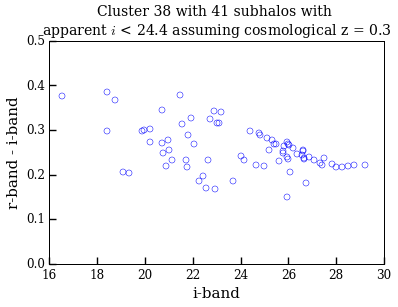

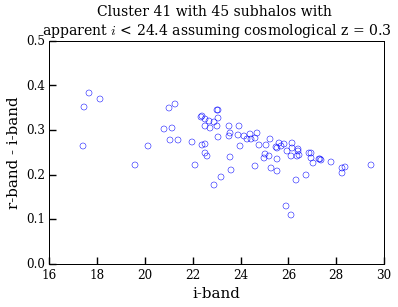

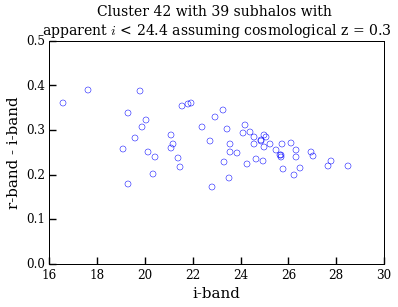

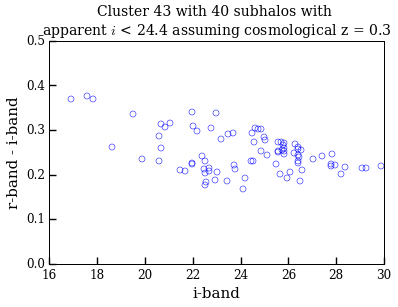

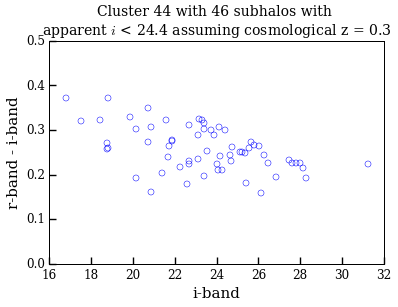

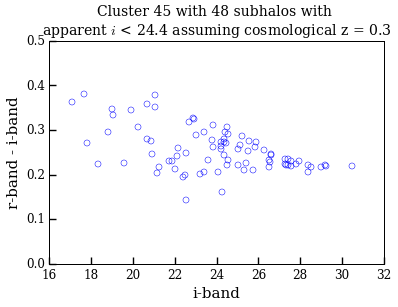

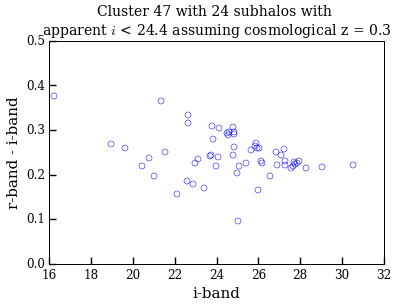

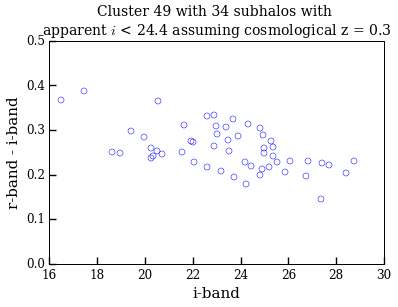

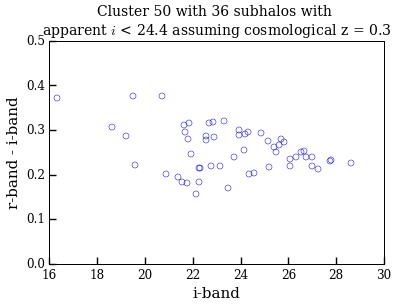

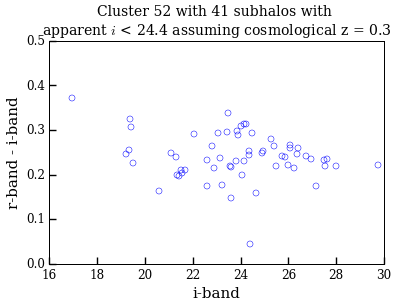

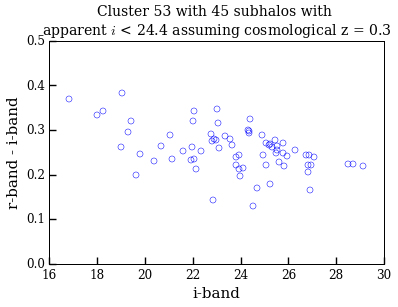

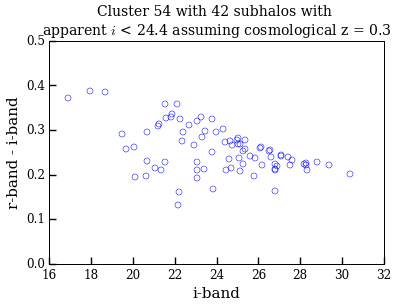

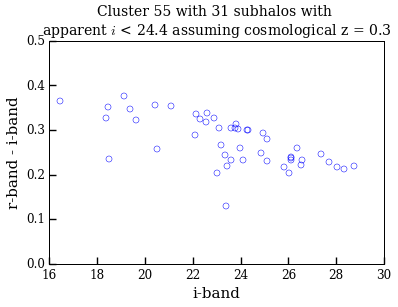

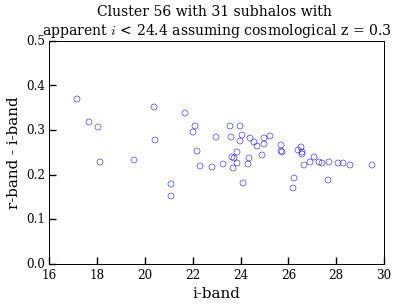

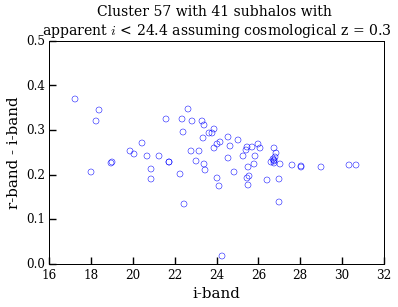

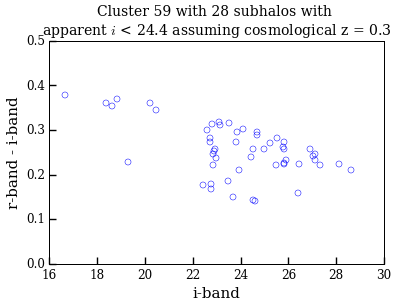

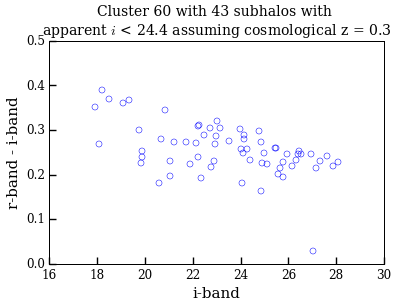

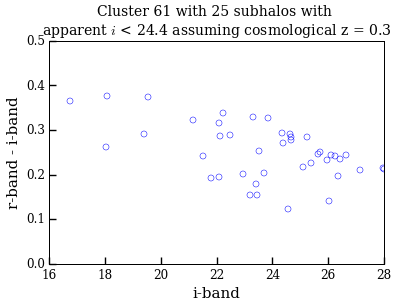

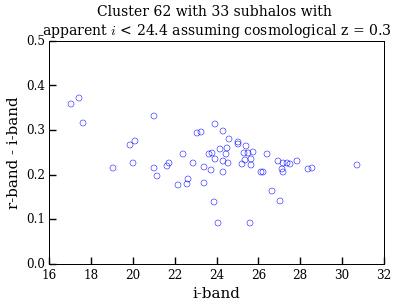

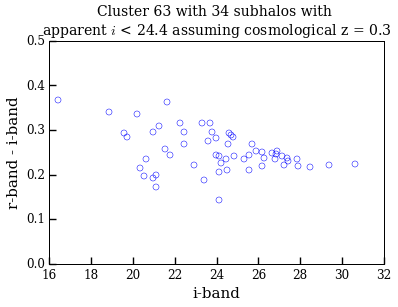

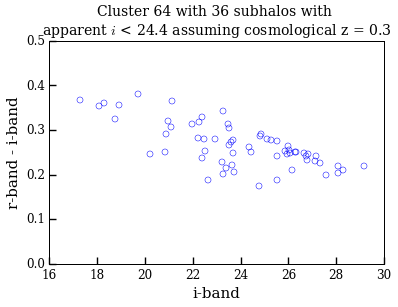

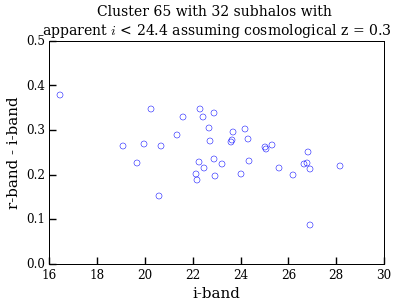

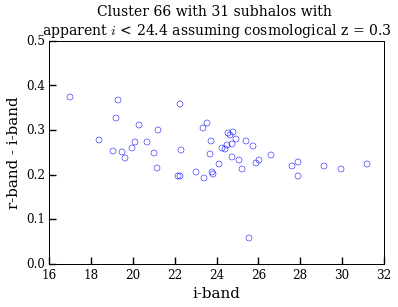

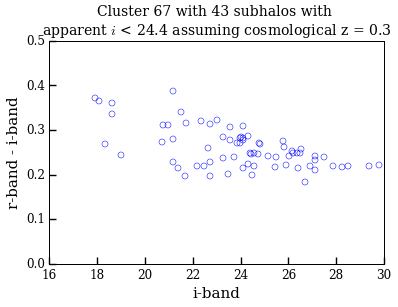

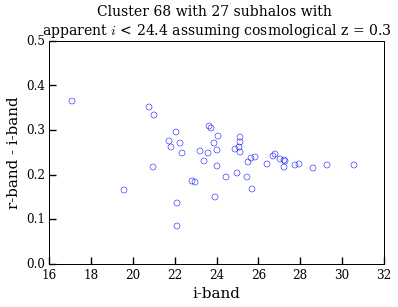

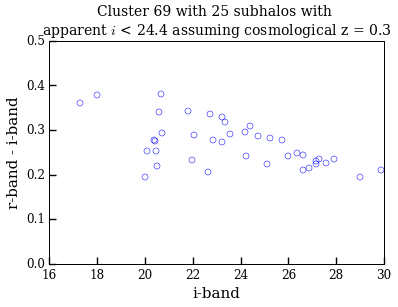

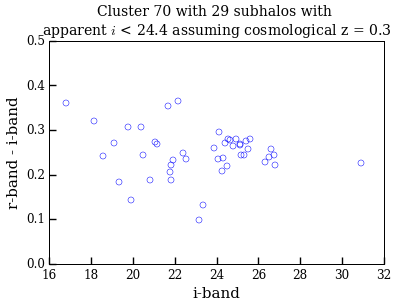

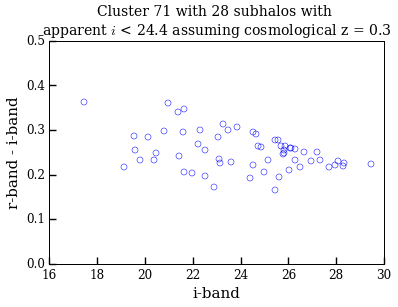

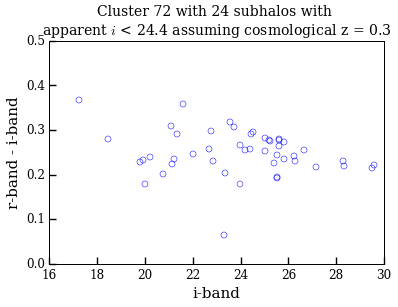

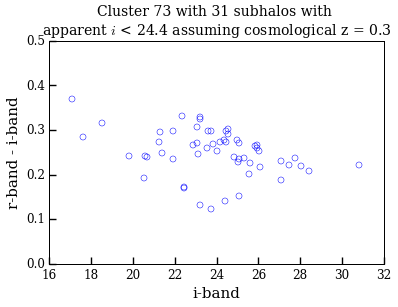

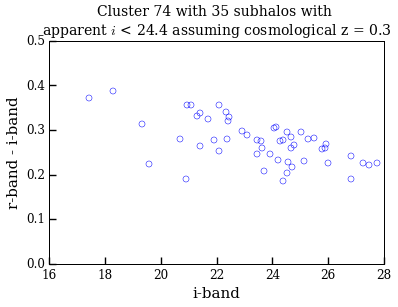

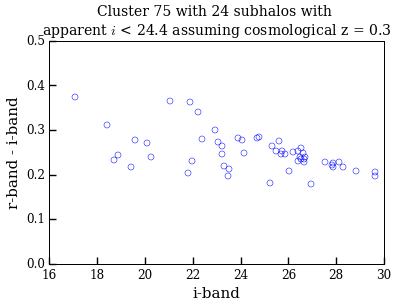

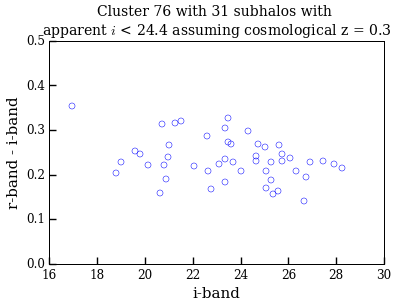

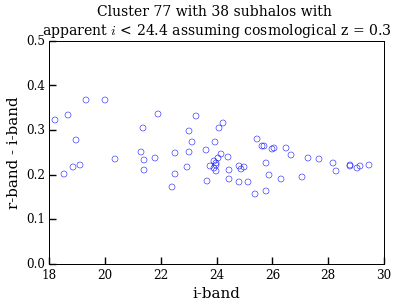

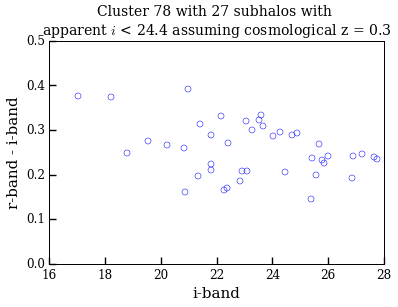

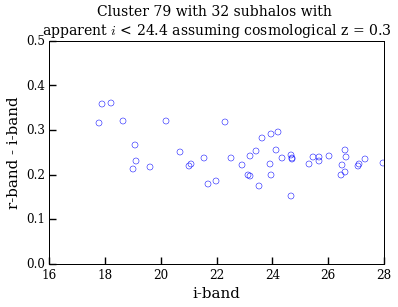

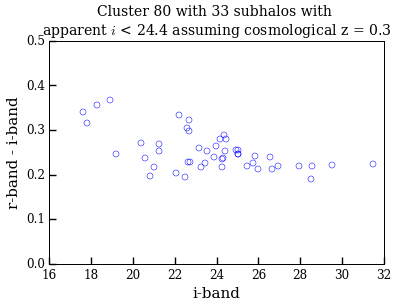

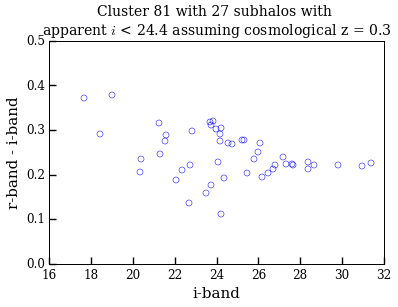

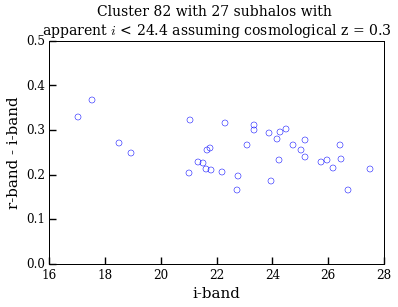

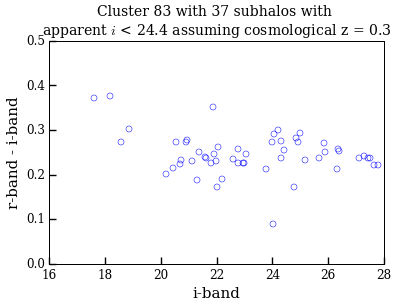

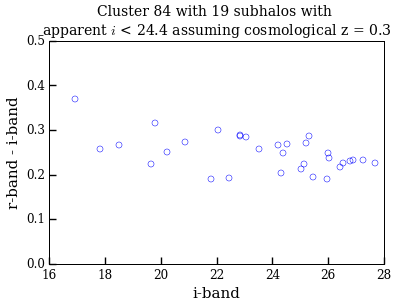

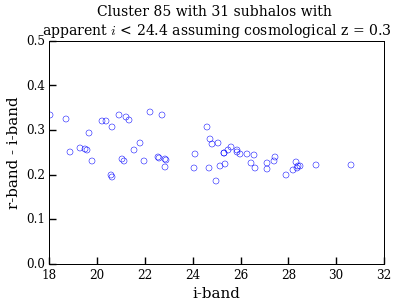

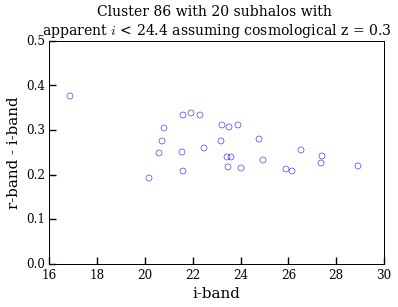

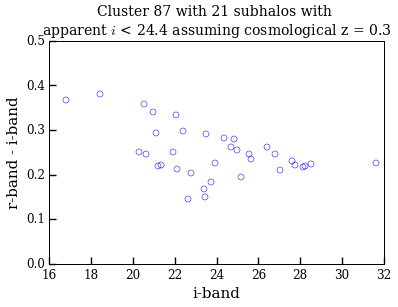

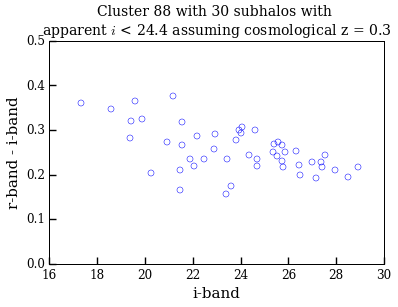

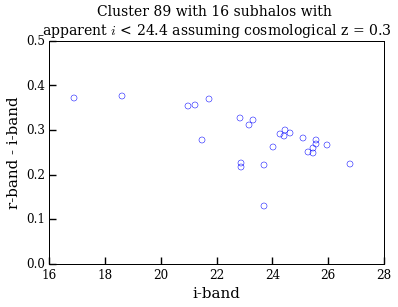

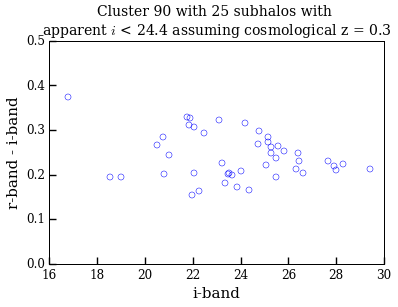

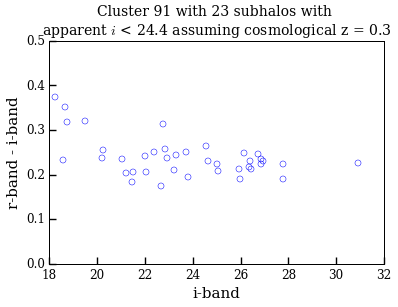

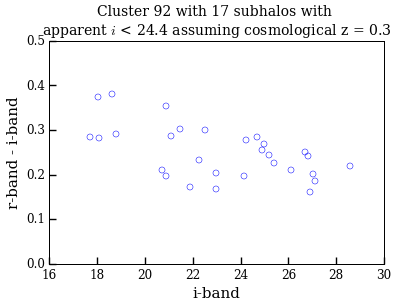

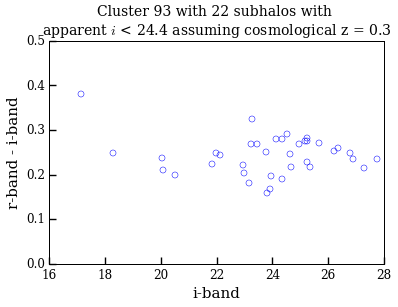

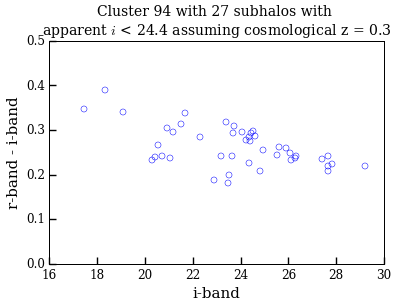

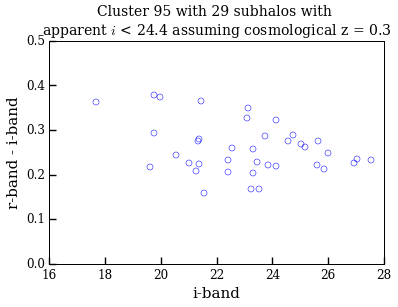

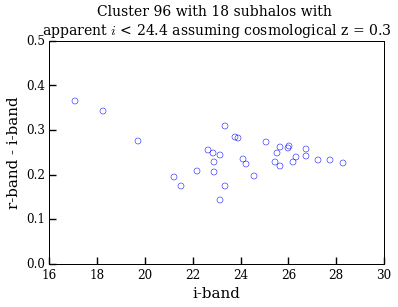

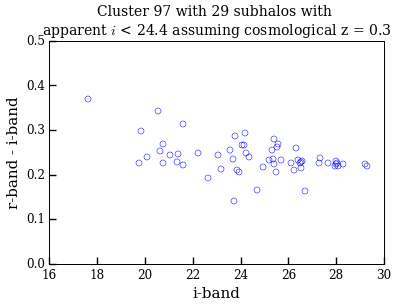

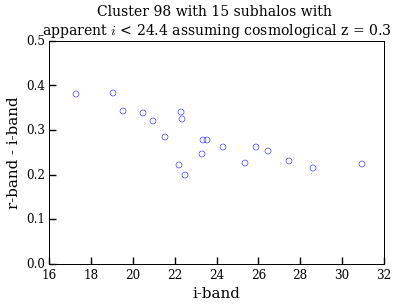

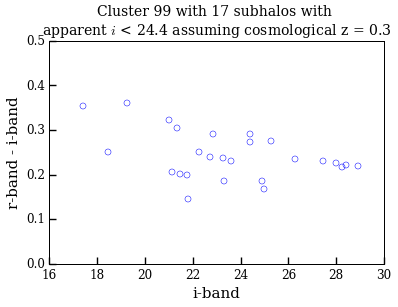

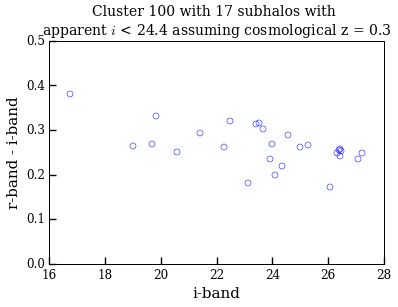

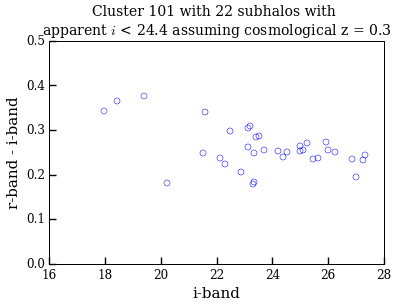

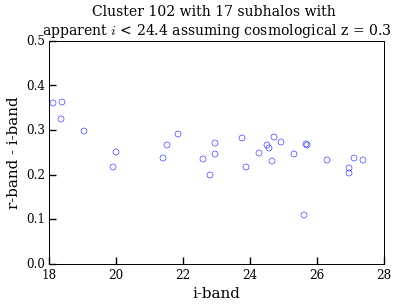

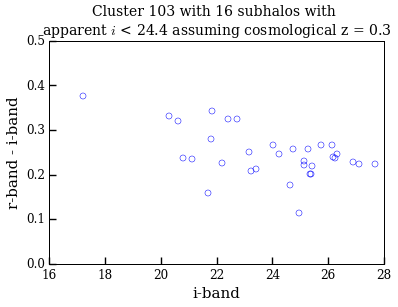

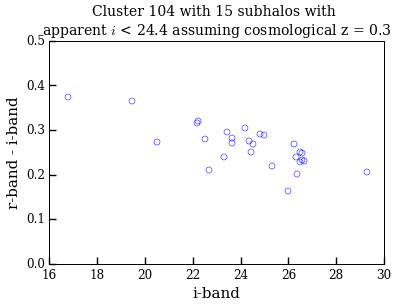

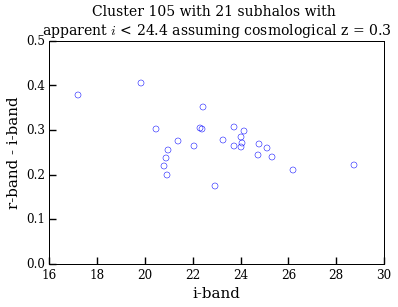

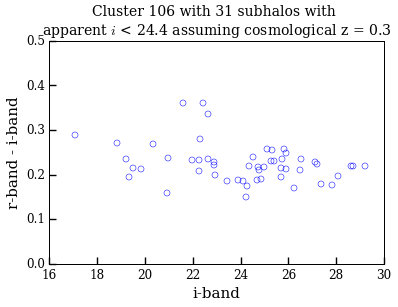

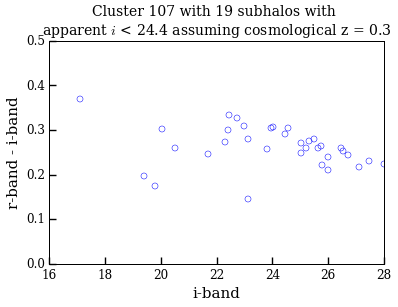

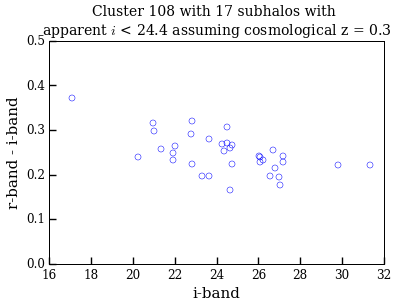

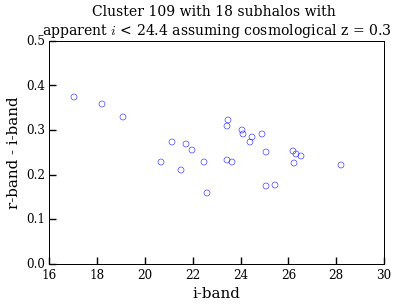

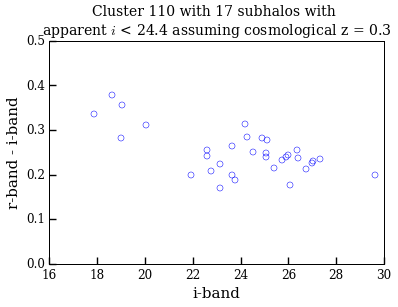

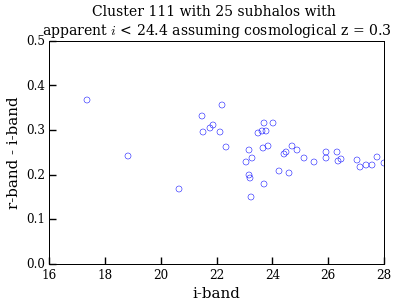

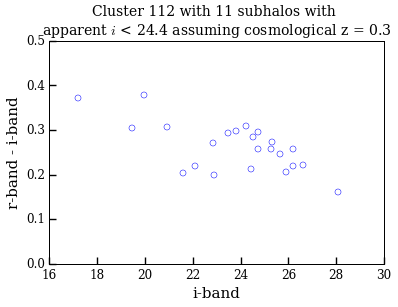

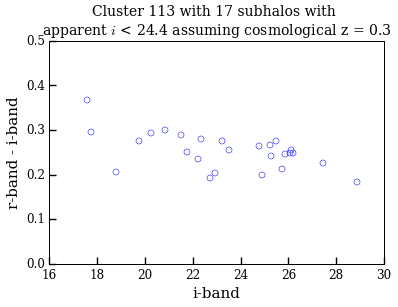

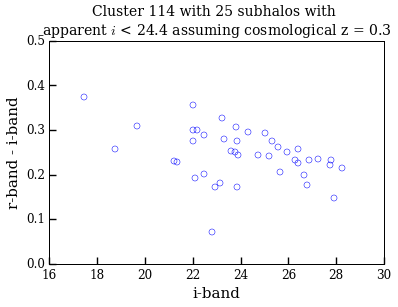

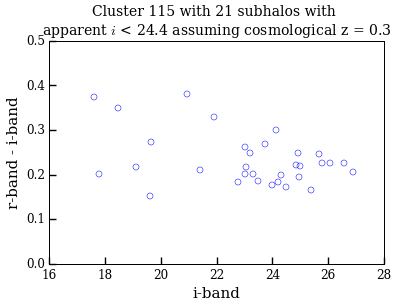

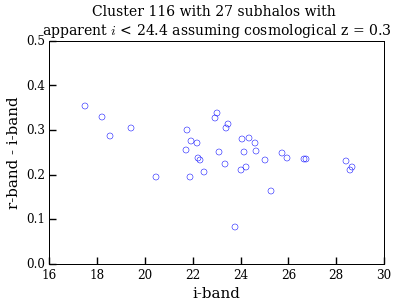

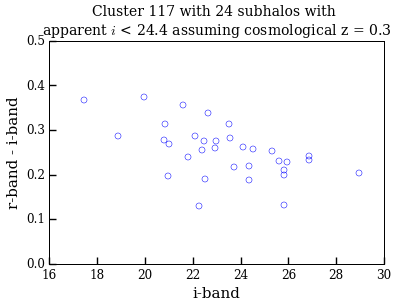

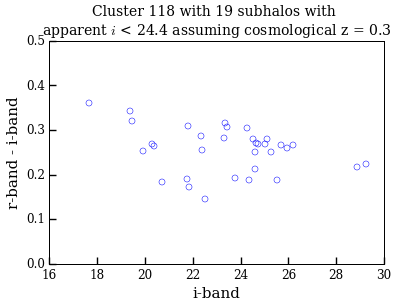

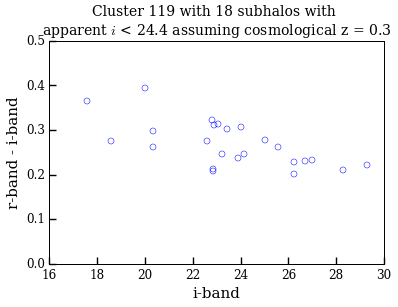

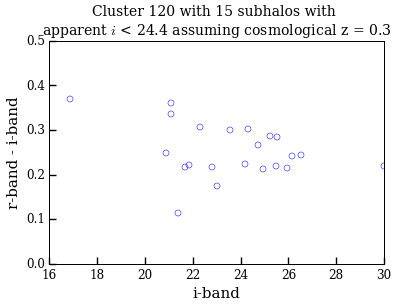

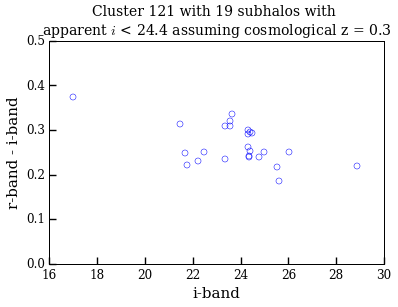

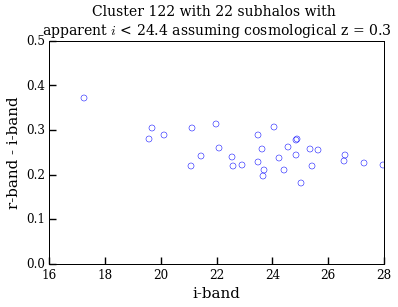

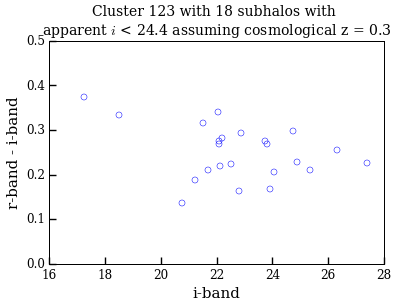

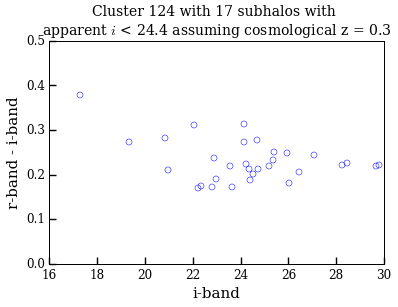

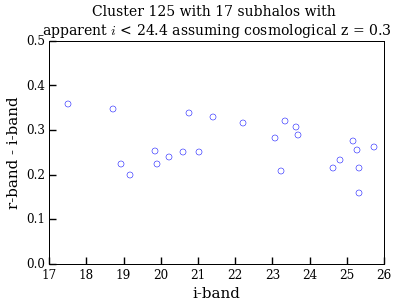

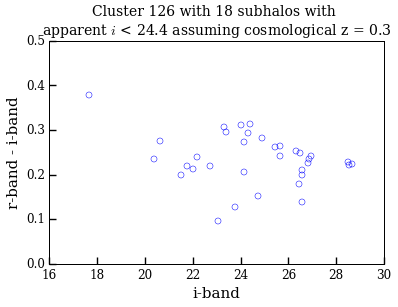

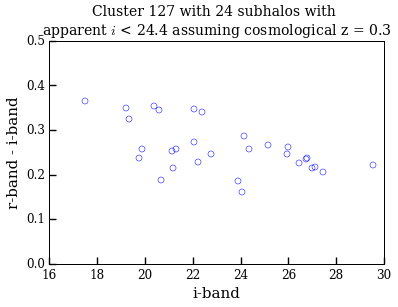

In [93]:
_ = map(lambda i: pg.plot_color_mag_diag(not_selected_dfs[i], "r_band", "i_band", 15, 
                        plot=True, clst=i, subhalo_len_lim=1e3,
                        save=False, verbose=False, closePlot=True, 
                                    showPlot=True),
    other_clusters)